# Exercise 6b: Consumer segmentation

Link to the dataset: https://archive.ics.uci.edu/ml/datasets/online+retail

Source: Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

Data Set Information:
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Attribute Information:
**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
**Description**: Product (item) name. Nominal.
**Quantity**: The quantities of each product (item) per transaction. Numeric.
**InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.
**UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
**Country**: Country name. Nominal, the name of the country where each customer resides.

# Exercises

1. Load the Online Retail Data Set and visualize the data set using scatter plots or other visualization techniques and see whether there are any natural groupings.
2. Preprocess the data. You can remove any missing values, normalize the numerical features ('Quantity' and 'UnitPrice'), and encode the categorical features ().
3. Use K-means clustering to cluster the data into different groups. Vary the number of clusters and evaluate the performance of the clustering using metrics such as the within-cluster sum of squares (WCSS) and silhouette coefficient.
4. Visualize the results of the K-means clustering by plotting the data points and the cluster centroids. You can use different colors or markers to differentiate the different clusters.
Analyze the clusters to gain insights into the data. You can examine the characteristics of the different clusters, such as their size, mean values, and standard deviations. You can also use techniques such as principal component analysis (PCA) to visualize the clusters in a lower-dimensional space.
Use the clusters to make predictions or recommendations. For example, you can recommend products to customers based on their cluster membership or identify customers who are most likely to purchase certain products.
Experiment with different distance metrics and clustering algorithms to see how they perform on the data set. You can also try different feature engineering techniques to see if they improve the performance of the clustering.


In [65]:
# Exercise 1

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Load the data set
df = pd.read_excel('../data/Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


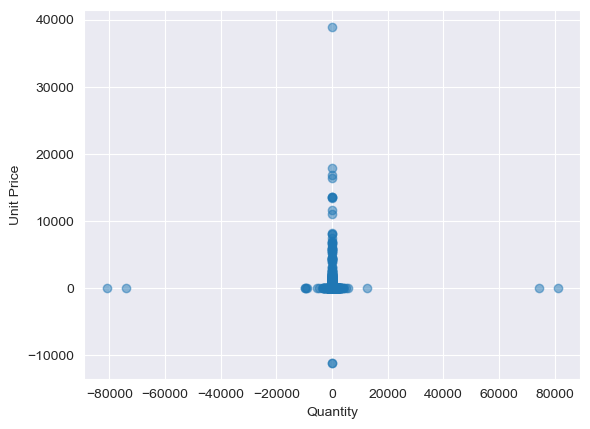

In [66]:
import matplotlib.pyplot as plt

# Visualize the data set using a scatter plot
plt.scatter(df['Quantity'], df['UnitPrice'], alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

In [70]:
# Exercise 2

# Remove missing values
df.dropna(inplace=True)

# Drop outliers
df = df[(df['UnitPrice'] < 20000) & (df['UnitPrice'] > 0)]
#quantiles = df.quantile(q=0.9)
#df = df[(df['Quantity'] <= quantiles['Quantity']) & (df['UnitPrice'] <= quantiles['UnitPrice'])]

# Normalize the numerical features
scaler = MinMaxScaler()
df[['Quantity', 'UnitPrice']] = scaler.fit_transform(df[['Quantity', 'UnitPrice']])

# Encode the categorical features
encoder = LabelEncoder()
df['StockCode'] = encoder.fit_transform(df['StockCode'].astype(str))
df['Description'] = encoder.fit_transform(df['Description'])
df['Country'] = encoder.fit_transform(df['Country'])

# Print the first five rows of the preprocessed data
print(df.tail())

       InvoiceNo  StockCode  Description  Quantity         InvoiceDate  \
541904    581587       1470         2263  0.500074 2011-12-09 12:50:00   
541905    581587       1746          695  0.500037 2011-12-09 12:50:00   
541906    581587       2086          701  0.500025 2011-12-09 12:50:00   
541907    581587       2087          700  0.500025 2011-12-09 12:50:00   
541908    581587       1039          271  0.500019 2011-12-09 12:50:00   

        UnitPrice  CustomerID  Country  TotalSales  
541904   0.000104     12680.0       13       10.20  
541905   0.000258     12680.0       13       12.60  
541906   0.000510     12680.0       13       16.60  
541907   0.000510     12680.0       13       16.60  
541908   0.000608     12680.0       13       14.85  


/var/folders/pz/j79jztxx2dgfzd595frqz2fw0000gn/T/ipykernel_4513/3134241579.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Quantity', 'UnitPrice']] = scaler.fit_transform(df[['Quantity', 'UnitPrice']])
/var/folders/pz/j79jztxx2dgfzd595frqz2fw0000gn/T/ipykernel_4513/3134241579.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StockCode'] = encoder.fit_transform(df['StockCode'].astype(str))
/var/folders/pz/j79jztxx2dgfzd595frqz2fw0000gn/T/ipykernel_4513/3134241579.py:18: SettingWithCopyWarnin

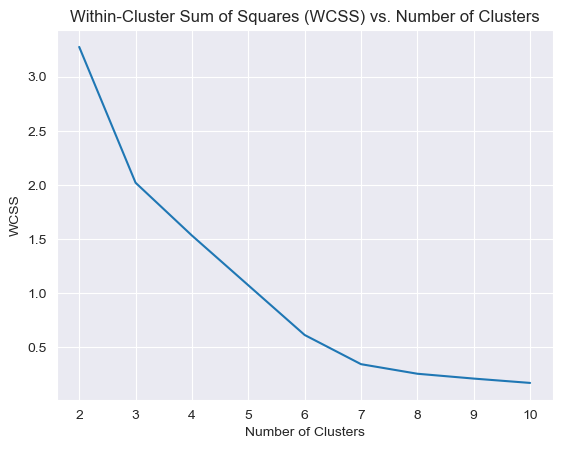

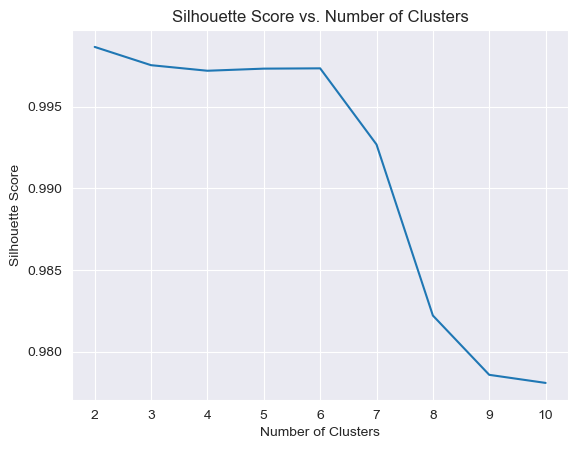

In [73]:
# Exercise 3

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Subset the data set to include only Quantity and UnitPrice
X = df[['Quantity', 'UnitPrice']]

# Vary the number of clusters and evaluate the performance of the clustering
wcss = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Visualize the performance of the clustering using a plot of WCSS and Silhouette scores
plt.plot(range(2, 11), wcss)
plt.title('Within-Cluster Sum of Squares (WCSS) vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
